In [2]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout
from keras.layers import LSTM
from keras.layers import Embedding
from keras.layers import Conv1D, GlobalAveragePooling1D, MaxPooling1D
from keras.layers import Conv2D,Flatten
from keras.backend import argmax
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from keras.utils import to_categorical

ModuleNotFoundError: No module named 'numpy'

In [2]:
# fix random seed for reproducibility
numpy.random.seed(7)
csv_url='mrec20190331sfft.csv'

In [28]:
MM= pandas.read_csv(csv_url)
#Mdataset=shuffle(MM)
Mdataset=MM
#Mdataset=MM.sample(frac=1)
Mdataset.head(24)

,time,date,training,step,up,slice,F_1,F_2,F_3,F_4,...,F_119,F_120,F_121,F_122,F_123,F_124,F_125,F_126,F_127,F_128
0,1554034538313,13:15:38.313,0,3,1,20749,20.056,94.1213,56.6893,244.1506,...,0.9821,1.6455,1.2656,1.0433,1.3137,2.4414,1.0232,1.2927,0.7879,1.7651
1,1554034538958,13:15:38.958,0,4,1,11691,42.667,47.5442,72.8170,77.0697,...,1.0073,0.9375,0.8401,0.9308,0.8793,1.0529,1.0475,1.0450,1.2355,1.4466
2,1554034539517,13:15:39.517,0,5,1,16388,14.943,104.5249,123.5440,325.2235,...,0.4323,2.3395,1.9636,2.7001,1.6907,1.3859,1.2406,1.8272,2.2453,1.9073
3,1554034540279,13:15:40.279,0,7,1,7260,67.612,65.4221,27.6171,155.5133,...,0.7560,1.1747,0.5885,0.3979,0.7220,0.7708,0.3064,0.8781,0.7001,0.3874
4,1554034540774,13:15:40.774,0,8,1,10254,51.408,151.3434,105.4404,376.3469,...,0.4306,1.2238,1.7379,0.3559,0.4861,1.4681,0.6975,1.1393,1.1507,0.8577
5,1554034541375,13:15:41.375,0,9,1,12306,43.714,197.7310,287.9238,458.5304,...,0.1554,0.9977,0.3534,0.2905,0.0378,0.8668,1.0058,0.3264,0.7247,0.2743
6,1554034542523,13:15:42.523,0,11,1,12275,36.233,4.3915,16.2003,67.3880,...,1.1263,3.0966,0.7637,4.8209,2.8054,2.8560,6.5081,4.1053,4.8375,6.3500
7,1554034542921,13:15:42.921,0,12,1,11018,8.626,32.5530,114.6319,209.5523,...,12.8564,10.8709,12.2103,5.6484,4.5759,3.3081,11.8470,11.5552,9.8679,11.1101
8,1554034543324,13:15:43.324,0,13,1,48631,32.854,117.6710,414.5323,808.1890,...,0.7231,2.2230,0.1032,1.8384,0.9183,1.7533,0.5601,1.9654,1.1408,0.8986
9,1554034543872,13:15:43.872,0,14,1,12990,95.478,328.9371,369.8189,122.3947,...,0.1821,0.3310,0.1429,0.9825,0.4588,1.0916,0.6122,0.9901,0.4200,0.7634


In [29]:
Xdataset=Mdataset.iloc[:,6:]
Xdataset.head(4)

,F_1,F_2,F_3,F_4,F_5,F_6,F_7,F_8,F_9,F_10,...,F_119,F_120,F_121,F_122,F_123,F_124,F_125,F_126,F_127,F_128
0,20.056,94.1213,56.6893,244.1506,297.1014,68.4912,73.1389,86.4008,46.9100,33.9853,...,0.9821,1.6455,1.2656,1.0433,1.3137,2.4414,1.0232,1.2927,0.7879,1.7651
1,42.667,47.5442,72.8170,77.0697,35.0869,51.4889,103.3456,73.5672,6.5732,18.0737,...,1.0073,0.9375,0.8401,0.9308,0.8793,1.0529,1.0475,1.0450,1.2355,1.4466
2,14.943,104.5249,123.5440,325.2235,216.0460,188.1778,216.8083,106.9825,14.6230,98.7340,...,0.4323,2.3395,1.9636,2.7001,1.6907,1.3859,1.2406,1.8272,2.2453,1.9073
3,67.612,65.4221,27.6171,155.5133,82.3221,36.4214,46.7972,11.0348,7.9684,6.5255,...,0.7560,1.1747,0.5885,0.3979,0.7220,0.7708,0.3064,0.8781,0.7001,0.3874


In [30]:
Ydataset = Mdataset['up']
Ydataset.head(14)

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    2
11    2
12    2
13    2
Name: up, dtype: int64

In [31]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(Xdataset)
dataset[0]

array([0.05107705, 0.13282973, 0.0315936 , 0.11904173, 0.41328094,
       0.13013288, 0.06080097, 0.17240561, 0.11593018, 0.13377925,
       0.16578296, 0.22347617, 0.18588993, 0.24958625, 0.24999181,
       0.21088881, 0.25110176, 0.23986342, 0.18482355, 0.17883252,
       0.08571672, 0.04426925, 0.07225791, 0.04398994, 0.04239361,
       0.09207876, 0.02792083, 0.05240673, 0.03630493, 0.03536118,
       0.03906149, 0.05114374, 0.31190407, 0.07596091, 0.0062227 ,
       0.11509733, 0.05813498, 0.06469943, 0.03883907, 0.06532665,
       0.08104072, 0.15104461, 0.02481355, 0.04821453, 0.03800076,
       0.06716089, 0.03636204, 0.04252229, 0.02039525, 0.05664509,
       0.08343108, 0.0506808 , 0.05086898, 0.10339523, 0.06999565,
       0.10077718, 0.07215901, 0.05073296, 0.03928588, 0.08224652,
       0.10731719, 0.07810754, 0.09611584, 0.06576441, 0.04820583,
       0.01855257, 0.01783409, 0.0669564 , 0.05401583, 0.02569278,
       0.0042775 , 0.02914104, 0.00444942, 0.01840004, 0.03252

In [32]:
#dataset=dataset.reshape((dataset.shape[0],1,-1))
dataset=dataset.reshape(dataset.shape+(1,))
print(dataset.shape)
dataset[0,0]

(329, 128, 1)


array([0.05107705])

In [33]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
trainX, testX = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(trainX), len(testX))

220 109


In [34]:
# reshape into X=t and Y=t+1
look_width = 48
look_height=32
from sklearn import preprocessing 
from sklearn import utils
from io import StringIO

#trainX, trainY = create_dataset(train, look_back)
#testX, testY = create_dataset(test, look_back)
le = preprocessing.LabelEncoder()
YN=utils.column_or_1d(Ydataset, warn=True)



In [35]:
YO=le.fit_transform(YN)
YO
len(le.classes_)
Yclasses=len(le.classes_)
print(Yclasses)

2


In [36]:
trainY = YO[0:train_size]
testY=YO[train_size:len(YO)]
print('data:',len(trainY), len(testY))


data: 220 109


In [37]:
trainY

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0])

In [38]:
trainX.shape

(220, 128, 1)

In [39]:
# reshape input to be [samples, time steps, features]
#trainX = numpy.reshape(trainX, (trainX.shape[0],  trainX.shape[2],2))
#testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [40]:
print(trainX.shape)
#dataset.shape
print(trainY.shape)
#print('trainyo',trainYO.shape)


(220, 128, 1)
(220,)


In [41]:
seq_length = trainX.shape[1]
print(seq_length)

model = Sequential()
model.add(Conv1D(32, 1, activation='relu', input_shape=(seq_length,1)))
model.add(MaxPooling1D(1))
model.add(Conv1D(8, 1, activation='relu'))
#model.add(MaxPooling1D(1))
model.add(Dropout(0.1))
#model.add(Dense(128))
model.add(Conv1D(128,1 ))

model.add(Flatten())
#model.add(Conv1D(128,1 ))
#model.add(MaxPooling1D())
#model.add(Conv1D(128, 1, activation='r
elu'))
#model.add(GlobalAveragePooling1D())
model.add(Dropout(0.5))
model.add(Dense(Yclasses, activation='softmax'))
model.summary()

128
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_4 (Conv1D)            (None, 128, 32)           64        
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 128, 32)           0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 128, 8)            264       
_________________________________________________________________
dropout_3 (Dropout)          (None, 128, 8)            0         
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 128, 128)          1152      
_________________________________________________________________
flatten_2 (Flatten)          (None, 16384)             0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 16384)             0         
______

In [44]:
trainYO = to_categorical(trainY, num_classes=Yclasses)
testYO = to_categorical(testY, num_classes=Yclasses)

#model.compile(loss='categorical_crossentropy',
#              optimizer='adam',
#              metrics=['accuracy'])
model.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=['accuracy'])
model.fit(trainX, trainYO, epochs=170)


Epoch 1/170
220/220 [==============================] - 0s 1ms/step - loss: 0.0494 - acc: 0.9773
Epoch 2/170
220/220 [==============================] - 0s 241us/step - loss: 0.1547 - acc: 0.9455
Epoch 3/170
220/220 [==============================] - 0s 234us/step - loss: 0.0863 - acc: 0.9727
Epoch 4/170
220/220 [==============================] - 0s 240us/step - loss: 0.3453 - acc: 0.9045
Epoch 5/170
220/220 [==============================] - 0s 238us/step - loss: 0.1006 - acc: 0.9591
Epoch 6/170
220/220 [==============================] - 0s 243us/step - loss: 0.0310 - acc: 0.9909
Epoch 7/170
220/220 [==============================] - 0s 233us/step - loss: 0.2449 - acc: 0.9409
Epoch 8/170
220/220 [==============================] - 0s 233us/step - loss: 0.2138 - acc: 0.9273
Epoch 9/170
220/220 [==============================] - 0s 243us/step - loss: 0.0564 - acc: 0.9727
Epoch 10/170
220/220 [==============================] - 0s 247us/step - loss: 0.1911 - acc: 0.9318
Epoch 11/170
220/220 

220/220 [==============================] - 0s 268us/step - loss: 0.0735 - acc: 0.9818
Epoch 166/170
220/220 [==============================] - 0s 278us/step - loss: 0.1047 - acc: 0.9682
Epoch 167/170
220/220 [==============================] - 0s 266us/step - loss: 0.1147 - acc: 0.9773
Epoch 168/170
220/220 [==============================] - 0s 277us/step - loss: 0.0494 - acc: 0.9818
Epoch 169/170
220/220 [==============================] - 0s 277us/step - loss: 0.0868 - acc: 0.9818
Epoch 170/170
220/220 [==============================] - 0s 277us/step - loss: 0.2132 - acc: 0.9591


In [45]:
score = model.evaluate(testX, testYO)
print(score)

109/109 [==============================] - 0s 540us/step
[2.374495917503987, 0.7431192661917537]


In [46]:
score = model.evaluate(trainX, trainYO, verbose=1)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

220/220 [==============================] - 0s 208us/step
Test loss: 0.0053427535172721205
Test accuracy: 1.0


In [47]:
# Keras reported accuracy:
score = model.evaluate(testX,testYO, verbose=0) 
print(score[1])
# 0.98580000000000001

# Actual accuracy calculated manually:
predY= model.predict(trainX)
acc = sum([numpy.argmax(trainYO[i])==numpy.argmax(predY[i]) for i in range(len(trainYO))])/len(trainYO)
print(acc)
# 0.98580000000000001

print(score[1]==acc)
# True    

0.7431192661917537
1.0
False


In [48]:
# make predictions
trainPredict1 = model.predict(trainX)
testPredict1 = model.predict(testX)
#trainPredict1

In [49]:
#softmax(trainPredict)
trainPredict=numpy.argmax(trainPredict1,1)
testPredict=numpy.argmax(testPredict1,1)
diffY=trainPredict-trainY

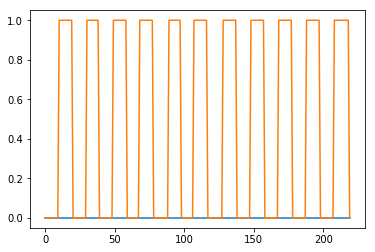

In [50]:
plt.plot(diffY)
plt.plot(trainY)
plt.show()

In [24]:

# invert predictions
#trainPredict = scaler.inverse_transform(trainPredict)
#trainY = scaler.inverse_transform([trainY])
#testPredict = scaler.inverse_transform(testPredict)
#testY = scaler.inverse_transform([testY])

In [25]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY, trainPredict))
print('Train Score: %.3f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY, testPredict))
print('Test Score: %.3f RMSE' % (testScore))

Train Score: 0.165 RMSE
Test Score: 0.525 RMSE


In [27]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
wws=2;
trainPredictPlot[wws:len(trainPredict)+wws,0] = trainPredict
wws=60
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+wws+1:len(dataset)-look_back-1, 0] = testPredict
# plot baseline and predictions

fig, ax1 = plt.subplots()


ax2 = ax1.twinx()
ax1.plot(trainY,label="set")
ax1.plot(trainPredictPlot,label="train")
ax2.plot(testPredictPlot,label="testm")
#plt.figure(figsize=(15,3))

plt.legend()
plt.show()

ValueError: could not broadcast input array from shape (220) into shape (220,1)